**Bloque 1: Instalaci√≥n de dependencias**

Explicaci√≥n:
El objetivo de este bloque es instalar la librer√≠a imblearn, que usaremos m√°s adelante para aplicar SMOTE (Synthetic Minority Oversampling Technique). SMOTE es una t√©cnica para manejar el desbalance de clases en la variable objetivo Exited (clientes que abandonan vs. los que no), generando datos sint√©ticos para la clase minoritaria (Exited=1). Esto mejora el rendimiento de los modelos de machine learning al entrenar con un dataset m√°s equilibrado.

En Microsoft Fabric, usamos el comando m√°gico %pip install para instalar librer√≠as en el entorno del notebook. Este comando reinicia el kernel de PySpark despu√©s de la instalaci√≥n para asegurarse de que los cambios se apliquen correctamente. Por eso, es importante ejecutar esta celda primero y esperar a que termine antes de continuar con el resto del notebook.

In [2]:
# Instalaci√≥n de dependencias
# Instalamos imblearn para usar SMOTE, que maneja el desbalance de clases.
# Esto reiniciar√° el kernel de PySpark, as√≠ que ejecuta esta celda primero y espera a que termine.
%pip install imblearn
# Nota: Si imblearn ya est√° instalado, esta celda no tendr√° efecto. El reinicio del kernel es necesario para aplicar cambios.

StatementMeta(, b7bb6db7-91b2-49a8-ab30-e6be7693453e, 15, Finished, Available, Finished)


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.



**Bloque 2: Carga de datos**

Explicaci√≥n:
El objetivo de este bloque es cargar el dataset churn.csv desde el lakehouse churn_lakehouse en Microsoft Fabric, utilizando la ruta ABFS: abfss://Fabric@onelake.dfs.fabric.microsoft.com/churn_lakehouse.Lakehouse/Files/data/churn.csv. Usaremos Spark para leer el archivo CSV, ya que es una herramienta eficiente para manejar grandes vol√∫menes de datos en Fabric. La opci√≥n header="true" asegura que la primera fila del archivo se interprete como los nombres de las columnas.

Adem√°s, mostraremos una vista previa de los datos con display(df) para inspeccionar las primeras filas y confirmar que el dataset se carg√≥ correctamente. Tambi√©n inicializaremos un temporizador con time.time() para medir el tiempo total de ejecuci√≥n del notebook, lo que nos permitir√° evaluar la eficiencia del proceso m√°s adelante.

In [3]:
# Carga de datos
# Cargamos el archivo churn.csv desde el lakehouse usando Spark.
# El dataset contiene informaci√≥n de clientes de un banco, con columnas como puntaje crediticio, ubicaci√≥n, g√©nero, edad, saldo, productos contratados, y si el cliente abandon√≥ el servicio (Exited).
# Usamos Spark para manejar datos eficientemente y mostramos una vista previa con display(df).

# Definir la ruta del dataset usando ABFS
DATA_PATH = "abfss://Fabric@onelake.dfs.fabric.microsoft.com/churn_lakehouse.Lakehouse/Files/data/churn.csv"

# Iniciar temporizador para medir el tiempo de ejecuci√≥n
import time
ts = time.time()

# Cargar el dataset
df = spark.read.format("csv").option("header", "true").load(DATA_PATH)
display(df)

StatementMeta(, b7bb6db7-91b2-49a8-ab30-e6be7693453e, 17, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 487a93b3-8db3-4b18-8a5b-4d29d58d8904)

**Bloque 3: Exploraci√≥n del esquema y columnas**

Explicaci√≥n:
En este bloque, nuestro objetivo es conocer mejor el dataset churn.csv que cargamos en el Bloque 2. Esto es crucial para cualquier proyecto de ciencia de datos, ya que nos permite:

Identificar los tipos de datos de cada columna y verificar si son correctos (por ejemplo, si CreditScore deber√≠a ser un entero en lugar de un string).
Obtener estad√≠sticas b√°sicas (como promedio, m√≠nimo, m√°ximo) para entender la distribuci√≥n de los datos.
Revisar los valores √∫nicos en columnas categ√≥ricas (como Geography o Gender) para identificar posibles categor√≠as y desbalances.
Detectar valores faltantes que podr√≠an requerir manejo en la etapa de limpieza.
El dataset churn.csv tiene 1000 filas y 14 columnas, y fue cargado como un Spark DataFrame (df). Convertiremos este DataFrame a pandas para facilitar el an√°lisis exploratorio, ya que pandas ofrece funciones m√°s convenientes para este prop√≥sito. Tambi√©n mostraremos los resultados de forma clara para documentar el proceso.


In [6]:
# Exploraci√≥n del esquema y columnas
# Inspeccionamos el esquema, estad√≠sticas b√°sicas, y valores √∫nicos para entender mejor los datos.

# Mostrar columnas y tipos de datos del DataFrame de Spark
print("Columnas del DataFrame:", df.columns)
print("Tipos de datos (Spark):")
for col, dtype in df.dtypes:
    print(f"{col}: {dtype}")

# Convertir a pandas para an√°lisis m√°s detallado
df_pandas = df.toPandas()

# Mostrar estad√≠sticas b√°sicas (promedio, min, max, etc.)
print("\nEstad√≠sticas b√°sicas del DataFrame:")
print(df_pandas.describe(include='all'))

# Mostrar valores √∫nicos y conteo para columnas categ√≥ricas
cat_vars = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']
for var in cat_vars:
    print(f"\nValores √∫nicos en {var}:", df_pandas[var].unique())
    print(f"Conteo de valores en {var}:")
    print(df_pandas[var].value_counts())
    print("---")

# Verificar valores faltantes
print("\nValores faltantes por columna:")
print(df_pandas.isnull().sum())

StatementMeta(, b7bb6db7-91b2-49a8-ab30-e6be7693453e, 20, Finished, Available, Finished)

Columnas del DataFrame: ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
Tipos de datos (Spark):
RowNumber: string
CustomerId: string
Surname: string
CreditScore: string
Geography: string
Gender: string
Age: string
Tenure: string
Balance: string
NumOfProducts: string
HasCrCard: string
IsActiveMember: string
EstimatedSalary: string
Exited: string

Estad√≠sticas b√°sicas del DataFrame:
       RowNumber CustomerId Surname CreditScore Geography Gender    Age  \
count      10000      10000   10000       10000     10000  10000  10000   
unique     10000      10000    2932         460         3      2     70   
top            1   15634602   Smith         850    France   Male     37   
freq           1          1      32         233      5014   5457    478   

       Tenure Balance NumOfProducts HasCrCard IsActiveMember EstimatedSalary  \
count   10000   10000   

**Bloque 4: Limpieza de datos**

Explicaci√≥n:
En este bloque, prepararemos el dataset churn.csv para las etapas posteriores (visualizaci√≥n, ingenier√≠a de caracter√≠sticas, y modelado) mediante un proceso de limpieza. La limpieza de datos es un paso crucial en cualquier proyecto de ciencia de datos, ya que asegura que el dataset est√© en un formato adecuado para el an√°lisis. Basado en los resultados del Bloque 3, identificamos los siguientes puntos a abordar:

Tipos de datos incorrectos:
Todas las columnas se cargaron como string (por ejemplo, CreditScore, Age, Balance), pero deber√≠an tener tipos num√©ricos para an√°lisis y modelado:
CreditScore, Age, Tenure, NumOfProducts, HasCrCard, IsActiveMember, Exited ‚Üí int.
Balance, EstimatedSalary ‚Üí float.
Convertiremos estas columnas a los tipos correctos.
Columnas irrelevantes:
RowNumber, CustomerId, y Surname no aportan valor predictivo para el modelado (son identificadores o datos no relevantes). Las eliminaremos.
Duplicados:
Verificaremos si hay filas duplicadas basadas en CustomerId (ya que cada cliente debe ser √∫nico) y las eliminaremos si existen.
Valores faltantes:
No hay valores faltantes seg√∫n el Bloque 3 (isnull().sum() mostr√≥ 0 para todas las columnas), as√≠ que no necesitamos manejar valores nulos.
Conversi√≥n a categor√≠as:
Para optimizar el uso de memoria y facilitar el an√°lisis, convertiremos columnas categ√≥ricas como NumOfProducts, HasCrCard, IsActiveMember, y Exited al tipo category en pandas.
Guardado como tabla Delta:
Guardaremos el DataFrame limpio como una tabla Delta en el lakehouse (Tables/df_clean) para usarlo en las siguientes etapas. Las tablas Delta son ideales en Fabric porque permiten un acceso eficiente y versionado de los datos.
El DataFrame limpio (df_clean) tendr√° menos columnas (11 en lugar de 14, tras eliminar RowNumber, CustomerId, Surname) y tipos de datos corregidos, listo para an√°lisis posteriores.


In [7]:
# Limpieza de datos
# Preparamos el DataFrame para an√°lisis: corregimos tipos de datos, eliminamos duplicados y columnas irrelevantes, y guardamos como tabla Delta.

def clean_data(df):
    # Convertir a pandas para limpieza
    df_pandas = df.toPandas()
    
    # Corregir tipos de datos
    df_pandas['CreditScore'] = df_pandas['CreditScore'].astype(int)
    df_pandas['Age'] = df_pandas['Age'].astype(int)
    df_pandas['Tenure'] = df_pandas['Tenure'].astype(int)
    df_pandas['Balance'] = df_pandas['Balance'].astype(float)
    df_pandas['NumOfProducts'] = df_pandas['NumOfProducts'].astype(int)
    df_pandas['HasCrCard'] = df_pandas['HasCrCard'].astype(int)
    df_pandas['IsActiveMember'] = df_pandas['IsActiveMember'].astype(int)
    df_pandas['EstimatedSalary'] = df_pandas['EstimatedSalary'].astype(float)
    df_pandas['Exited'] = df_pandas['Exited'].astype(int)
    
    # Eliminar filas duplicadas basadas en CustomerId
    df_pandas.drop_duplicates(subset=['CustomerId'], inplace=True)
    
    # Eliminar columnas irrelevantes: RowNumber, CustomerId, Surname
    df_pandas.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)
    
    # Convertir columnas categ√≥ricas a tipo category
    df_pandas['Geography'] = df_pandas['Geography'].astype('category')
    df_pandas['Gender'] = df_pandas['Gender'].astype('category')
    df_pandas['NumOfProducts'] = df_pandas['NumOfProducts'].astype('category')
    df_pandas['HasCrCard'] = df_pandas['HasCrCard'].astype('category')
    df_pandas['IsActiveMember'] = df_pandas['IsActiveMember'].astype('category')
    df_pandas['Exited'] = df_pandas['Exited'].astype('category')
    
    return df_pandas

# Limpiar el DataFrame
df_clean = clean_data(df)

# Mostrar primeras filas y tipos de datos del DataFrame limpio
print("Primeras filas de df_clean:")
print(df_clean.head())
print("\nTipos de datos de df_clean:")
print(df_clean.dtypes)

# Guardar como tabla Delta
spark.createDataFrame(df_clean).write.format("delta").mode("overwrite").save("Tables/df_clean")

StatementMeta(, b7bb6db7-91b2-49a8-ab30-e6be7693453e, 21, Finished, Available, Finished)

Primeras filas de df_clean:
   CreditScore Geography  Gender  Age  Tenure    Balance NumOfProducts  \
0          619    France  Female   42       2       0.00             1   
1          608     Spain  Female   41       1   83807.86             1   
2          502    France  Female   42       8  159660.80             3   
3          699    France  Female   39       1       0.00             2   
4          850     Spain  Female   43       2  125510.82             1   

  HasCrCard IsActiveMember  EstimatedSalary Exited  
0         1              1        101348.88      1  
1         0              1        112542.58      0  
2         1              0        113931.57      1  
3         0              0         93826.63      0  
4         1              1         79084.10      0  

Tipos de datos de df_clean:
CreditScore           int64
Geography          category
Gender             category
Age                   int64
Tenure                int64
Balance             float64
NumOfProduct

**Bloque 5: Visualizaci√≥n**

Explicaci√≥n:
En este bloque, exploraremos visualmente el dataset limpio (df_clean) para entender mejor las relaciones entre las variables y la variable objetivo Exited (si el cliente abandon√≥ o no). La visualizaci√≥n es un paso clave en el an√°lisis exploratorio de datos, ya que nos permite identificar patrones, tendencias, y posibles correlaciones que guiar√°n las etapas posteriores (como ingenier√≠a de caracter√≠sticas y modelado). Usaremos las librer√≠as seaborn y matplotlib, que son ideales para generar gr√°ficos claros y atractivos.

Vamos a crear dos tipos de gr√°ficos:

Gr√°ficos de barras para variables categ√≥ricas:
Analizaremos c√≥mo se distribuyen las variables categ√≥ricas (Geography, Gender, NumOfProducts, HasCrCard, IsActiveMember) en relaci√≥n con Exited.
Esto nos ayudar√° a ver, por ejemplo, si los clientes de ciertas regiones (Geography) tienen m√°s probabilidad de abandonar, o si el g√©nero (Gender) influye en la tasa de abandono.
Histogramas para variables num√©ricas:
Exploraremos la distribuci√≥n de las variables num√©ricas (CreditScore, Age, Tenure, Balance, EstimatedSalary) y c√≥mo se relacionan con Exited.
Esto nos permitir√° identificar patrones, como si los clientes m√°s j√≥venes tienden a abandonar m√°s, o si un saldo bajo est√° asociado con una mayor tasa de abandono.
Guardado de gr√°ficos:

Los gr√°ficos se guardar√°n en la carpeta results/ del lakehouse, usando la ruta ABFS abfss://Fabric@onelake.dfs.fabric.microsoft.com/churn_lakehouse.Lakehouse/Files/results/.


StatementMeta(, b7bb6db7-91b2-49a8-ab30-e6be7693453e, 27, Finished, Available, Finished)

Variable dependiente (target): Exited
Variables categ√≥ricas: ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
Variables num√©ricas: ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']


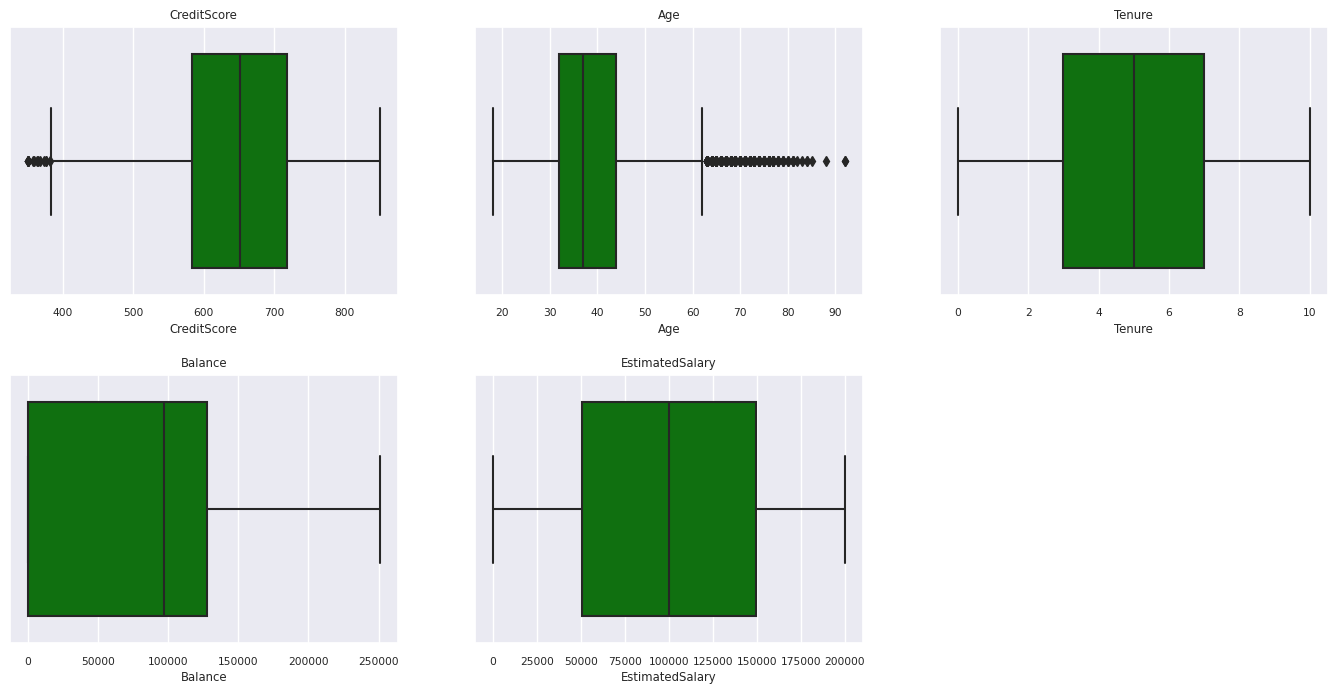

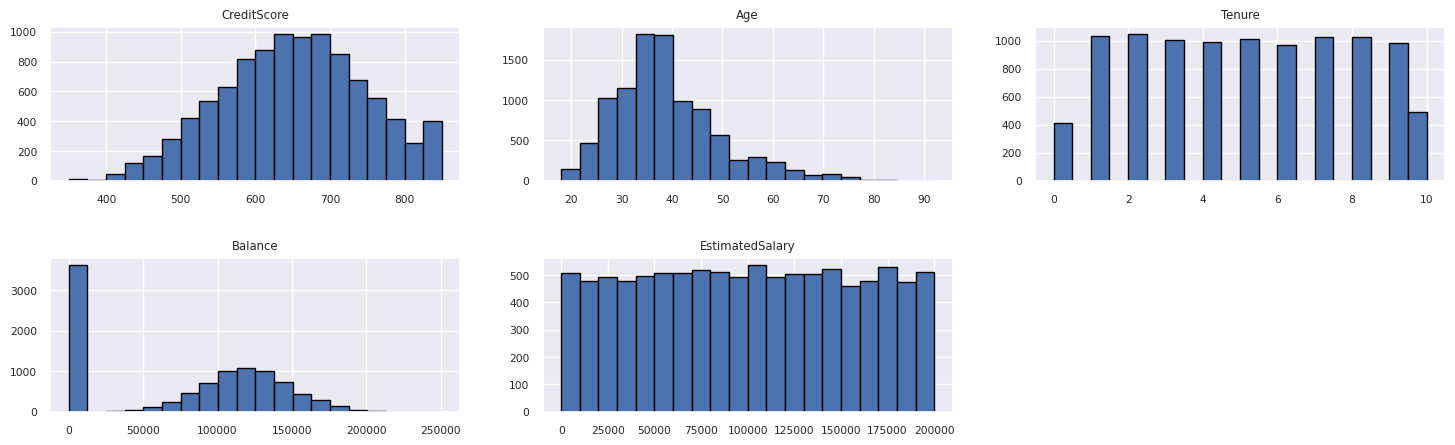

/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass obs

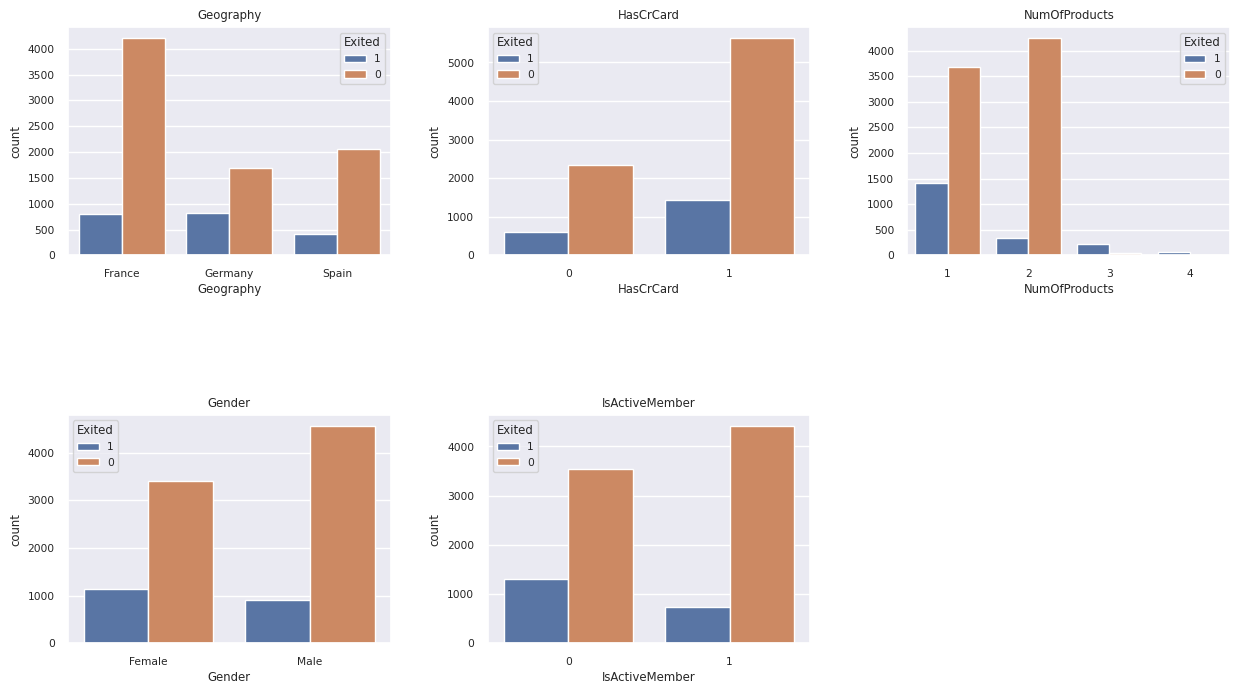

/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass obs

In [13]:
# Visualizaci√≥n
# Usamos seaborn y matplotlib para explorar los datos visualmente.
# Generamos boxplots, histogramas y gr√°ficos de barras para variables categ√≥ricas.
# Mostramos los gr√°ficos en el notebook y los guardamos en la carpeta results/.

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import rc, rcParams
import numpy as np
import pandas as pd
import itertools
from io import BytesIO

# Configurar estilo visual
sns.set_theme(style="whitegrid", palette="tab10", rc={'figure.figsize':(9,6)})
sns.set(font_scale=0.7)

# Verificar que df_clean tenga datos
if df_clean.empty:
    raise ValueError("El DataFrame df_clean est√° vac√≠o. Verifica los pasos anteriores.")

# Determinar el target, variables categ√≥ricas y num√©ricas
dependent_variable_name = "Exited"
print("Variable dependiente (target):", dependent_variable_name)

# Variables categ√≥ricas: tipo object o category, excluyendo Exited
categorical_variables = [col for col in df_clean.columns if df_clean[col].dtype.name in ['object', 'category']
                         and col not in "Exited"]
print("Variables categ√≥ricas:", categorical_variables)

# Variables num√©ricas: especificamos expl√≠citamente
numeric_variables = [col for col in ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
                     if col in df_clean.columns]
print("Variables num√©ricas:", numeric_variables)

# Crear boxplots para variables num√©ricas (resumen de cinco n√∫meros: min, Q1, mediana, Q3, max)
df_num_cols = df_clean[numeric_variables]
fig, axes = plt.subplots(nrows=2, ncols=3, gridspec_kw=dict(hspace=0.3), figsize=(17,8))
for ax, col in zip(axes.flatten(), df_num_cols.columns):
    sns.boxplot(x=df_num_cols[col], color='green', ax=ax)
    ax.set_title(col)
if len(df_num_cols.columns) < 6:  # Eliminar ejes vac√≠os si hay menos de 6 variables
    fig.delaxes(axes[1,2])
plt.show()

# Guardar boxplots usando BytesIO y Spark
for col in df_num_cols.columns:
    plt.figure(figsize=(9,6))
    sns.boxplot(x=df_num_cols[col], color='green')
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    # Guardar en un b√∫fer de memoria
    buf = BytesIO()
    plt.savefig(buf, format='png')
    plt.close()
    buf.seek(0)
    # Convertir el b√∫fer a un RDD para usar Spark
    image_data = buf.read()
    image_rdd = spark.sparkContext.parallelize([image_data])
    # Guardar en OneLake usando Spark
    onelake_path = f'abfss://Fabric@onelake.dfs.fabric.microsoft.com/churn_lakehouse.Lakehouse/Files/results/boxplot_{col.lower()}.png'
    image_rdd.saveAsTextFile(onelake_path)

# Crear histogramas para variables num√©ricas
columns = df_num_cols.columns
fig = plt.figure(figsize=(18, 8))
length = len(columns)
for i, j in itertools.zip_longest(columns, range(length)):
    plt.subplot((length // 2) + 1, 3, j+1)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    df_num_cols[i].hist(bins=20, edgecolor='black')
    plt.title(i)
plt.show()

# Guardar histogramas usando BytesIO y Spark
for col in columns:
    plt.figure(figsize=(9,6))
    df_num_cols[col].hist(bins=20, edgecolor='black')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Conteo')
    buf = BytesIO()
    plt.savefig(buf, format='png')
    plt.close()
    buf.seek(0)
    image_data = buf.read()
    image_rdd = spark.sparkContext.parallelize([image_data])
    onelake_path = f'abfss://Fabric@onelake.dfs.fabric.microsoft.com/churn_lakehouse.Lakehouse/Files/results/hist_{col.lower()}.png'
    image_rdd.saveAsTextFile(onelake_path)

# Visualizar distribuci√≥n de Exited en variables categ√≥ricas
attr_list = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'NumOfProducts']
fig, axarr = plt.subplots(2, 3, figsize=(15, 8))
for ind, item in enumerate(attr_list):
    if item in df_clean.columns:
        sns.countplot(x=item, hue=df_clean['Exited'], data=df_clean, ax=axarr[ind%2][ind//2])
        axarr[ind%2][ind//2].set_title(item)
if len(attr_list) < 6:
    fig.delaxes(axarr[1,2])
fig.subplots_adjust(hspace=0.7, wspace=0.3)
plt.show()

# Guardar gr√°ficos de barras usando BytesIO y Spark
for var in attr_list:
    if var in df_clean.columns:
        plt.figure(figsize=(9,6))
        sns.countplot(x=var, hue=df_clean['Exited'], data=df_clean)
        plt.title(f'Distribuci√≥n de {var} por Exited')
        plt.xlabel(var)
        plt.ylabel('Conteo')
        buf = BytesIO()
        plt.savefig(buf, format='png')
        plt.close()
        buf.seek(0)
        image_data = buf.read()
        image_rdd = spark.sparkContext.parallelize([image_data])
        onelake_path = f'abfss://Fabric@onelake.dfs.fabric.microsoft.com/churn_lakehouse.Lakehouse/Files/results/churn_{var.lower()}.png'
        image_rdd.saveAsTextFile(onelake_path)

StatementMeta(, bc7cfb5b-162a-4e1a-9dc8-28b7a4d707a7, 57, Finished, Available, Finished)

/opt/spark/python/lib/pyspark.zip/pyspark/sql/pandas/conversion.py:351: UserWarning: createDataFrame attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Exception thrown when converting pandas.Series (int32) with name 'NumOfProducts' to Arrow Array (string).
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)


SynapseWidget(Synapse.DataFrame, c28a141d-d6f9-46b5-a54f-cc0a5a3e8204)

Variable dependiente (target): Exited
Variables categ√≥ricas: ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
Variables num√©ricas: ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']


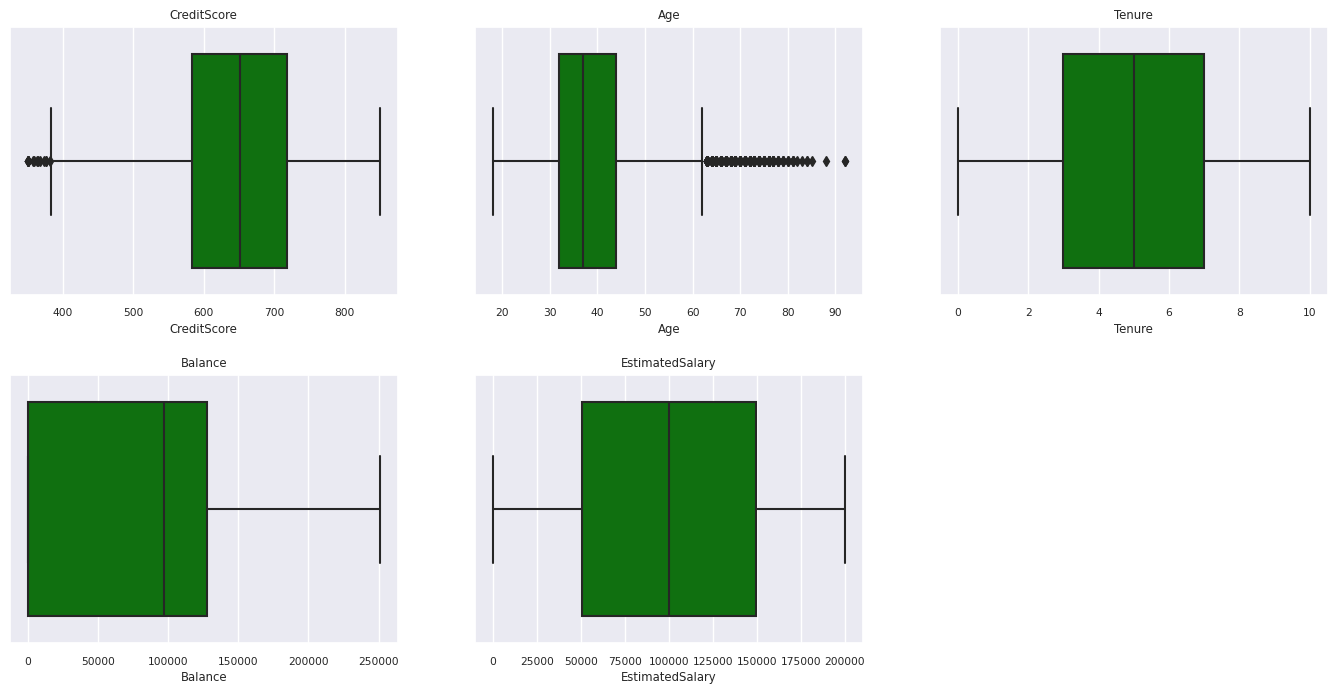

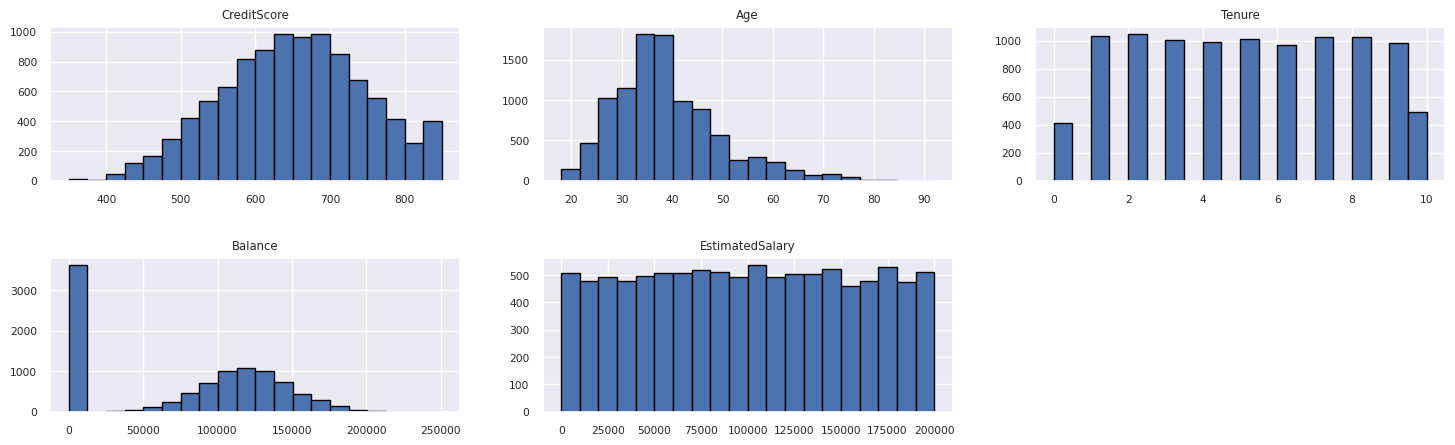

/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass obs

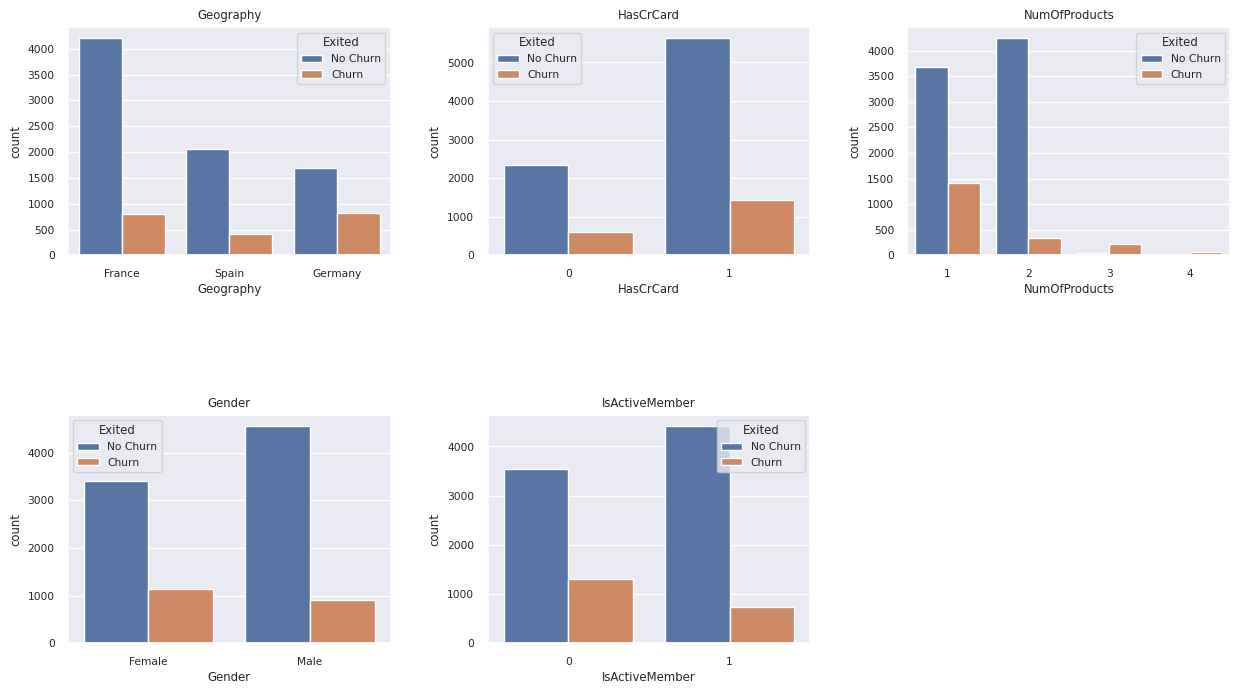

In [32]:
# Importar librer√≠as para visualizaci√≥n
import seaborn as sns
sns.set_theme(style="whitegrid", palette="tab10", rc={'figure.figsize':(9,6)})
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import rc, rcParams
import numpy as np
import pandas as pd
import itertools

# Mostrar estad√≠sticas resumidas del DataFrame limpio
# Esto genera una tabla interactiva en Fabric con estad√≠sticas (conteo, media, min, max, etc.)
display(df_clean, summary=True)

# Determinar el target, variables categ√≥ricas y num√©ricas
# Target
dependent_variable_name = "Exited"
print("Variable dependiente (target):", dependent_variable_name)

# Variables categ√≥ricas: tipo object o category, excluyendo Exited
categorical_variables = [col for col in df_clean.columns if df_clean[col].dtype.name in ['object', 'category']
                        and col not in "Exited"]
print("Variables categ√≥ricas:", categorical_variables)

# Variables num√©ricas: especificamos expl√≠citamente CreditScore, Age, Tenure, Balance, EstimatedSalary
numeric_variables = [col for col in ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
                     if col in df_clean.columns]
print("Variables num√©ricas:", numeric_variables)

# Crear boxplots para variables num√©ricas (resumen de cinco n√∫meros: min, Q1, mediana, Q3, max)
df_num_cols = df_clean[numeric_variables]
sns.set(font_scale=0.7)
fig, axes = plt.subplots(nrows=2, ncols=3, gridspec_kw=dict(hspace=0.3), figsize=(17,8))
for ax, col in zip(axes.flatten(), df_num_cols.columns):
    sns.boxplot(x=df_num_cols[col], color='green', ax=ax)
    ax.set_title(col)
if len(df_num_cols.columns) < 6:  # Eliminar ejes vac√≠os si hay menos de 6 variables
    fig.delaxes(axes[1,2])
plt.show()

# Crear histogramas para variables num√©ricas
columns = df_num_cols.columns
fig = plt.figure(figsize=(18, 8))
length = len(columns)
for i, j in itertools.zip_longest(columns, range(length)):
    plt.subplot((length // 2) + 1, 3, j+1)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    df_num_cols[i].hist(bins=20, edgecolor='black')
    plt.title(i)
plt.show()

# Visualizar distribuci√≥n de Exited en variables categ√≥ricas
# Usamos countplot para comparar churn vs. no churn
# Excluimos Tenure porque es num√©rica
# Convertimos Exited a string temporalmente para evitar el error en la leyenda
attr_list = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'NumOfProducts']
fig, axarr = plt.subplots(2, 3, figsize=(15, 8))
for ind, item in enumerate(attr_list):
    if item in df_clean.columns:  # Verificar que la columna exista
        # Usar hue con etiquetas personalizadas para Exited
        sns.countplot(x=item, hue=df_clean['Exited'].map({0: 'No Churn', 1: 'Churn'}), data=df_clean, ax=axarr[ind%2][ind//2])
        axarr[ind%2][ind//2].set_title(item)
if len(attr_list) < 6:  # Eliminar ejes vac√≠os si hay menos de 6 variables
    fig.delaxes(axarr[1,2])
fig.subplots_adjust(hspace=0.7, wspace=0.3)
plt.show()

**Bloque 6: Ingenier√≠a de caracter√≠sticas**

Explicaci√≥n:
En este bloque, vamos a crear nuevas caracter√≠sticas derivadas a partir de las variables existentes en df_clean para mejorar el poder predictivo del modelo. La ingenier√≠a de caracter√≠sticas es un paso clave en el proceso de ciencia de datos, ya que permite capturar relaciones no lineales y patrones que pueden no ser evidentes con las variables originales. Adem√°s, discretizaremos algunas variables num√©ricas en categor√≠as para facilitar el modelado, especialmente para algoritmos como Random Forest que se benefician de variables categ√≥ricas.

Basado en los resultados del Bloque 5, sabemos que:

Variables categ√≥ricas: Geography, Gender, NumOfProducts, HasCrCard, IsActiveMember.
Variables num√©ricas: CreditScore, Age, Tenure, Balance, EstimatedSalary.
Variable objetivo: Exited.
Acciones:

Crear nuevas caracter√≠sticas:
NewTenure: Relaci√≥n entre Tenure y Age (Tenure / Age). Esto captura la proporci√≥n de tiempo que el cliente ha sido miembro en relaci√≥n con su edad, lo que podr√≠a indicar estabilidad o experiencia financiera.
Discretizar variables num√©ricas:
CreditScore: Dividiremos en 6 categor√≠as (usando pd.qcut para crear intervalos con igual n√∫mero de observaciones).
Age: Dividiremos en 8 categor√≠as.
Balance: Dividiremos en 5 categor√≠as.
EstimatedSalary: Dividiremos en 10 categor√≠as.
Discretizar estas variables convierte valores continuos en rangos categ√≥ricos, lo que puede ayudar a capturar relaciones no lineales y mejorar el rendimiento de ciertos modelos.
Guardado como tabla Delta:
Guardaremos el DataFrame actualizado con las nuevas caracter√≠sticas como una tabla Delta en Tables/df_clean (sobrescribiendo la tabla anterior) para usarlo en las siguientes etapas.


In [16]:
# Ingenier√≠a de caracter√≠sticas
# Creamos nuevas caracter√≠sticas derivadas y discretizamos variables num√©ricas para mejorar el poder predictivo.
# Guardamos el DataFrame actualizado como tabla Delta.

import pandas as pd

# Crear nuevas caracter√≠sticas
# Relaci√≥n entre Tenure y Age
df_clean["NewTenure"] = df_clean["Tenure"] / df_clean["Age"]

# Discretizar variables num√©ricas en categor√≠as
# CreditScore: 6 categor√≠as
df_clean["NewCreditsScore"] = pd.qcut(df_clean['CreditScore'], 6, labels=[1, 2, 3, 4, 5, 6])

# Age: 8 categor√≠as
df_clean["NewAgeScore"] = pd.qcut(df_clean['Age'], 8, labels=[1, 2, 3, 4, 5, 6, 7, 8])

# Balance: 5 categor√≠as (usamos rank para manejar valores repetidos como 0)
df_clean["NewBalanceScore"] = pd.qcut(df_clean['Balance'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

# EstimatedSalary: 10 categor√≠as (usamos rank para manejar valores repetidos)
df_clean["NewEstSalaryScore"] = pd.qcut(df_clean['EstimatedSalary'].rank(method='first'), 10, labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Asegurar que Exited sea int para consistencia
df_clean['Exited'] = df_clean['Exited'].astype(int)

# Mostrar primeras filas y tipos de datos del DataFrame actualizado
print("Primeras filas de df_clean con nuevas caracter√≠sticas:")
print(df_clean.head())
print("\nTipos de datos de df_clean:")
print(df_clean.dtypes)

# Guardar como tabla Delta
# Opcional: Eliminar la tabla existente para evitar conflictos de esquema
try:
    dbutils.fs.rm("abfss://Fabric@onelake.dfs.fabric.microsoft.com/churn_lakehouse.Lakehouse/Tables/df_clean", recurse=True)
    print("Tabla existente eliminada para evitar conflictos de esquema.")
except:
    print("No se pudo eliminar la tabla existente o no existe; continuando con sobrescritura.")

# Guardar el DataFrame como tabla Delta con overwriteSchema para permitir cambios en el esquema
spark.createDataFrame(df_clean).write.format("delta").mode("overwrite").option("overwriteSchema", "true").save("Tables/df_clean")

StatementMeta(, b7bb6db7-91b2-49a8-ab30-e6be7693453e, 30, Finished, Available, Finished)

Primeras filas de df_clean con nuevas caracter√≠sticas:
   CreditScore Geography  Gender  Age  Tenure    Balance NumOfProducts  \
0          619    France  Female   42       2       0.00             1   
1          608     Spain  Female   41       1   83807.86             1   
2          502    France  Female   42       8  159660.80             3   
3          699    France  Female   39       1       0.00             2   
4          850     Spain  Female   43       2  125510.82             1   

  HasCrCard IsActiveMember  EstimatedSalary  Exited  NewTenure  \
0         1              1        101348.88       1   0.047619   
1         0              1        112542.58       0   0.024390   
2         1              0        113931.57       1   0.190476   
3         0              0         93826.63       0   0.025641   
4         1              1         79084.10       0   0.046512   

  NewCreditsScore NewAgeScore NewBalanceScore NewEstSalaryScore  
0               3           6       

**Bloque 7: Modelado**

Explicaci√≥n:
En este bloque, vamos a construir, entrenar y rastrear modelos de machine learning para predecir la variable objetivo Exited (si un cliente abandona o no). Usaremos MLflow para rastrear los experimentos, lo que nos permitir√° comparar el rendimiento de diferentes modelos y guardar los resultados de forma organizada. Dado el desbalance de clases en Exited (7,963 no abandonan vs. 2,037 abandonan, seg√∫n el Bloque 3), aplicaremos SMOTE para generar datos sint√©ticos de la clase minoritaria (Exited=1) y mejorar el rendimiento de los modelos.

Acciones:

Preparar los datos:
Convertiremos las columnas categ√≥ricas (Geography, Gender, NumOfProducts, HasCrCard, IsActiveMember, NewCreditsScore, NewAgeScore, NewBalanceScore, NewEstSalaryScore) a variables dummy (codificaci√≥n one-hot) usando pd.get_dummies.
Dividiremos los datos en entrenamiento (80%) y prueba (20%) usando train_test_split de scikit-learn.
Aplicar SMOTE:
Usaremos SMOTE para balancear la clase Exited en el conjunto de entrenamiento, generando datos sint√©ticos para la clase minoritaria.
Configurar MLflow:
Configuraremos un experimento en MLflow para rastrear los modelos.
MLflow nos permitir√° registrar m√©tricas, par√°metros y artefactos de los modelos.
Entrenar modelos:
Entrenaremos dos modelos Random Forest con diferentes profundidades (max_depth=4 y max_depth=8) y un modelo LightGBM.
Guardaremos los modelos y sus identificadores de ejecuci√≥n (run_id) para usarlos en la evaluaci√≥n posterior.
Rastrear los modelos:
Usaremos MLflow para registrar cada modelo, sus par√°metros y m√©tricas.


In [17]:
# Modelado
# Entrenamos modelos de machine learning para predecir Exited, usando SMOTE para balancear clases.
# Rastrearemos los experimentos con MLflow.

import mlflow
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE

# Cargar datos desde la tabla Delta
SEED = 12345
df_clean = spark.read.format("delta").load("Tables/df_clean").toPandas()

# Preparar datos para el modelado
# Separar caracter√≠sticas (X) y variable objetivo (y)
X = df_clean.drop('Exited', axis=1)
y = df_clean['Exited'].astype(int)

# Convertir columnas categ√≥ricas a dummy
categorical_cols = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
                   'NewCreditsScore', 'NewAgeScore', 'NewBalanceScore', 'NewEstSalaryScore']
X = pd.get_dummies(X, columns=categorical_cols)

# Dividir en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Aplicar SMOTE para balancear la clase Exited en el conjunto de entrenamiento
smote = SMOTE(random_state=SEED)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Configurar experimento con MLflow
EXPERIMENT_NAME = "sample-bank-churn-experiment"
mlflow.set_experiment(EXPERIMENT_NAME)
mlflow.autolog(exclusive=False)

# Entrenar modelos
# Random Forest (max_depth=4)
with mlflow.start_run(run_name="rfc1_sm"):
    rfc1 = RandomForestClassifier(max_depth=4, random_state=SEED)
    rfc1.fit(X_train_sm, y_train_sm)
    mlflow.sklearn.log_model(rfc1, "model")
    rfc1_sm_run_id = mlflow.active_run().info.run_id
    print(f"Random Forest (max_depth=4) run_id: {rfc1_sm_run_id}")

# Random Forest (max_depth=8)
with mlflow.start_run(run_name="rfc2_sm"):
    rfc2 = RandomForestClassifier(max_depth=8, random_state=SEED)
    rfc2.fit(X_train_sm, y_train_sm)
    mlflow.sklearn.log_model(rfc2, "model")
    rfc2_sm_run_id = mlflow.active_run().info.run_id
    print(f"Random Forest (max_depth=8) run_id: {rfc2_sm_run_id}")

# LightGBM
with mlflow.start_run(run_name="lgbm_sm"):
    lgbm = LGBMClassifier(random_state=SEED)
    lgbm.fit(X_train_sm, y_train_sm)
    mlflow.lightgbm.log_model(lgbm, "model")
    lgbm_sm_run_id = mlflow.active_run().info.run_id
    print(f"LightGBM run_id: {lgbm_sm_run_id}")

StatementMeta(, b7bb6db7-91b2-49a8-ab30-e6be7693453e, 31, Finished, Available, Finished)

2025/05/16 01:13:54 INFO mlflow.tracking.fluent: Experiment with name 'sample-bank-churn-experiment' does not exist. Creating a new experiment.
2025/05/16 01:14:01 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/05/16 01:14:01 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of sklearn. If you encounter errors during autologging, try upgrading / downgrading sklearn to a supported version, or try upgrading MLflow.
2025/05/16 01:14:01 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/05/16 01:14:01 INFO mlflow.tracking.fluent: Autologging successfully enabled for lightgbm.
2025/05/16 01:14:03 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/mlflow/types/utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing valu

Random Forest (max_depth=4) run_id: ccca2198-7958-4da1-adb6-a36ad30520a2


2025/05/16 01:14:22 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/mlflow/types/utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/05/16 01:14:25 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/trusted-serv

Random Forest (max_depth=8) run_id: fe73aa20-87e2-4f78-8266-88a80527a7d1


[LightGBM] [Info] Number of positive: 6378, number of negative: 6378
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034713 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1180
[LightGBM] [Info] Number of data points in the train set: 12756, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM run_id: 2c0918ac-4d2d-49fa-bc00-fa8f6b4a3b93


2025/05/16 01:14:35 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/mlflow/types/utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


**Bloque 8: Evaluaci√≥n**

Explicaci√≥n:
En este bloque, vamos a evaluar los modelos entrenados en el Bloque 7 (Random Forest con max_depth=4, Random Forest con max_depth=8, y LightGBM) usando el conjunto de prueba. Cargaremos los modelos desde MLflow, generaremos predicciones, y calcularemos m√©tricas de evaluaci√≥n como precisi√≥n, recall, F1-score, y matrices de confusi√≥n. Tambi√©n visualizaremos las matrices de confusi√≥n para comparar visualmente el rendimiento de los modelos. Finalmente, guardaremos los resultados de las predicciones como una tabla Delta para an√°lisis posterior.

Acciones:

Cargar modelos desde MLflow:
Usaremos los run_id generados en el Bloque 7 para cargar los modelos.
Generar predicciones:
Haremos predicciones en el conjunto de prueba (X_test) con cada modelo.
Evaluar modelos:
Calcularemos m√©tricas de evaluaci√≥n (classification_report) y matrices de confusi√≥n.
Generaremos gr√°ficos de las matrices de confusi√≥n.
Guardar resultados:
Guardaremos las predicciones y las etiquetas reales como una tabla Delta (Tables/df_pred_results) para an√°lisis posterior.


StatementMeta(, b7bb6db7-91b2-49a8-ab30-e6be7693453e, 32, Finished, Available, Finished)

Random Forest (max_depth=4):
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      1585
           1       0.56      0.64      0.60       415

    accuracy                           0.82      2000
   macro avg       0.73      0.75      0.74      2000
weighted avg       0.83      0.82      0.83      2000

Random Forest (max_depth=8):
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1585
           1       0.68      0.59      0.63       415

    accuracy                           0.86      2000
   macro avg       0.79      0.76      0.77      2000
weighted avg       0.85      0.86      0.85      2000

LightGBM:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1585
           1       0.74      0.53      0.62       415

    accuracy                           0.86      2000
   macro avg       0.81      0.74      0.77      2000
weight

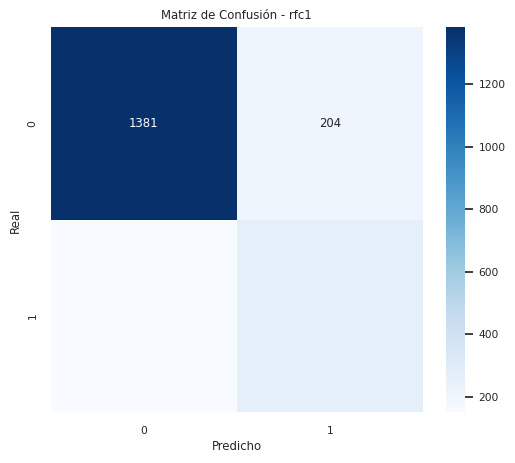

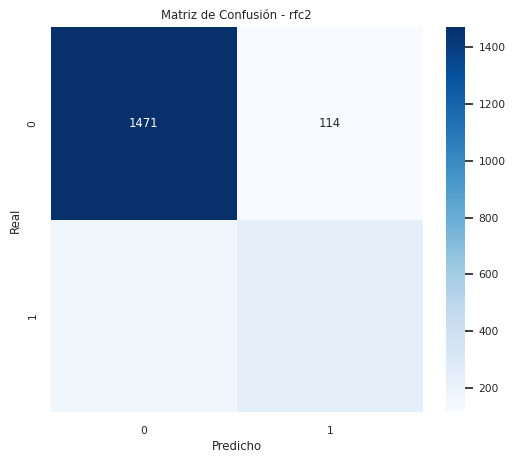

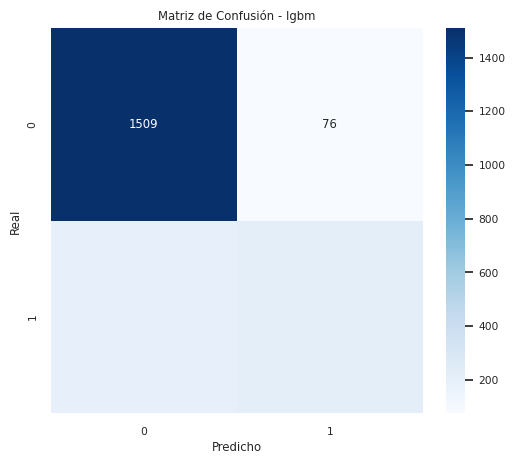

StatementMeta(, b7bb6db7-91b2-49a8-ab30-e6be7693453e, 33, Finished, Available, Finished)

In [18]:
# Evaluaci√≥n
# Cargamos los modelos entrenados desde MLflow, generamos predicciones en el conjunto de prueba,
# evaluamos el rendimiento con m√©tricas y matrices de confusi√≥n, y guardamos los resultados.

import mlflow
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Definir los run_id de los modelos entrenados en el Bloque 7
rfc1_sm_run_id = "ccca2198-7958-4da1-adb6-a36ad30520a2"
rfc2_sm_run_id = "fe73aa20-87e2-4f78-8266-88a80527a7d1"
lgbm_sm_run_id = "2c0918ac-4d2d-49fa-bc00-fa8f6b4a3b93"

# Cargar modelos desde MLflow
load_model_rfc1_sm = mlflow.sklearn.load_model(f"runs:/{rfc1_sm_run_id}/model")
load_model_rfc2_sm = mlflow.sklearn.load_model(f"runs:/{rfc2_sm_run_id}/model")
load_model_lgbm1_sm = mlflow.lightgbm.load_model(f"runs:/{lgbm_sm_run_id}/model")

# Generar predicciones en el conjunto de prueba
# Nota: X_test y y_test fueron definidos en el Bloque 7
ypred_rfc1_sm = load_model_rfc1_sm.predict(X_test)
ypred_rfc2_sm = load_model_rfc2_sm.predict(X_test)
ypred_lgbm1_sm = load_model_lgbm1_sm.predict(X_test)

# Calcular m√©tricas de evaluaci√≥n
print("Random Forest (max_depth=4):")
print(classification_report(y_test, ypred_rfc1_sm))
print("Random Forest (max_depth=8):")
print(classification_report(y_test, ypred_rfc2_sm))
print("LightGBM:")
print(classification_report(y_test, ypred_lgbm1_sm))

# Calcular matrices de confusi√≥n
cm_rfc1 = confusion_matrix(y_test, ypred_rfc1_sm)
cm_rfc2 = confusion_matrix(y_test, ypred_rfc2_sm)
cm_lgbm = confusion_matrix(y_test, ypred_lgbm1_sm)

# Visualizar matrices de confusi√≥n
for cm, name in [(cm_rfc1, 'rfc1'), (cm_rfc2, 'rfc2'), (cm_lgbm, 'lgbm')]:
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusi√≥n - {name}')
    plt.xlabel('Predicho')
    plt.ylabel('Real')
    plt.show()

# Guardar resultados como tabla Delta
# Crear un DataFrame con las predicciones y etiquetas reales
df_pred = X_test.copy()
df_pred['y_test'] = y_test
df_pred['ypred_rfc1_sm'] = ypred_rfc1_sm
df_pred['ypred_rfc2_sm'] = ypred_rfc2_sm
df_pred['ypred_lgbm1_sm'] = ypred_lgbm1_sm

# Guardar como tabla Delta
spark.createDataFrame(df_pred).write.format("delta").mode("overwrite").save("Tables/df_pred_results")

**Bloque 9: An√°lisis de resultados**

Explicaci√≥n:
En este bloque, vamos a analizar los resultados de las predicciones para identificar patrones en los abandonos (Exited=1). Cargaremos las predicciones desde Tables/df_pred_results, calcularemos tasas de abandono por categor√≠as clave (como Geography, Gender, HasCrCard, IsActiveMember, NumOfProducts), y visualizaremos estas tasas para entender qu√© factores est√°n m√°s asociados con el abandono. Tambi√©n guardaremos los resultados actualizados para referencia futura.

Acciones:

Cargar predicciones:
Cargaremos df_pred_results desde la tabla Delta.
Calcular tasas de abandono:
Calcularemos la tasa de abandono general y por categor√≠as (Geography, Gender, HasCrCard, IsActiveMember, NumOfProducts).
Visualizar tasas de abandono:
Generaremos gr√°ficos de barras para mostrar las tasas de abandono por categor√≠a.
Mostraremos los gr√°ficos en el notebook.
Guardar resultados:
A√±adiremos las tasas de abandono al DataFrame y lo guardaremos nuevamente como tabla Delta.


StatementMeta(, b7bb6db7-91b2-49a8-ab30-e6be7693453e, 36, Finished, Available, Finished)

Cargando df_pred desde Tables/df_pred_results...
df_pred cargado correctamente:
   CreditScore  Age  Tenure    Balance  EstimatedSalary  NewTenure  \
0          701   41       2       0.00         47856.78   0.048780   
1          594   24       0   97378.54         71405.17   0.000000   
2          511   57       8  122950.31        181258.76   0.140351   
3          850   32       4  156001.68        151677.31   0.125000   
4          551   30       2  143340.44        145796.49   0.066667   

   Geography_France  Geography_Germany  Geography_Spain  Gender_Female  ...  \
0              True              False            False           True  ...   
1             False              False             True           True  ...   
2             False              False             True           True  ...   
3              True              False            False          False  ...   
4             False               True            False           True  ...   

   y_test  ypred_rfc1_sm

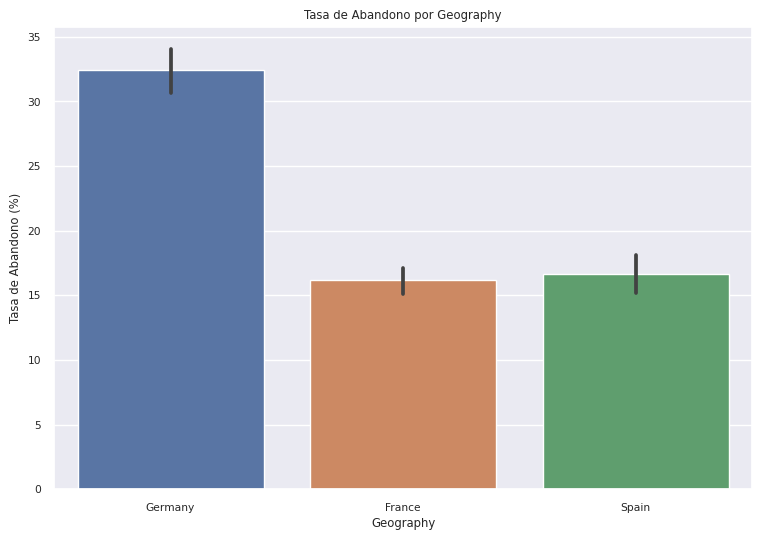

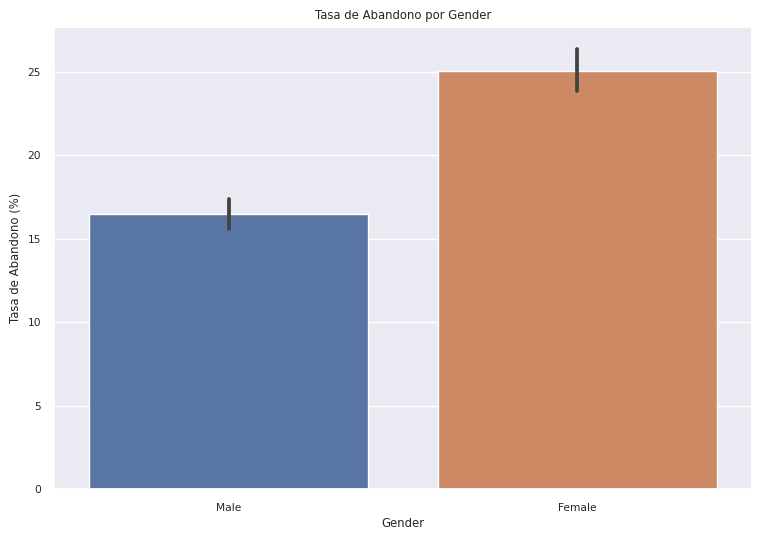

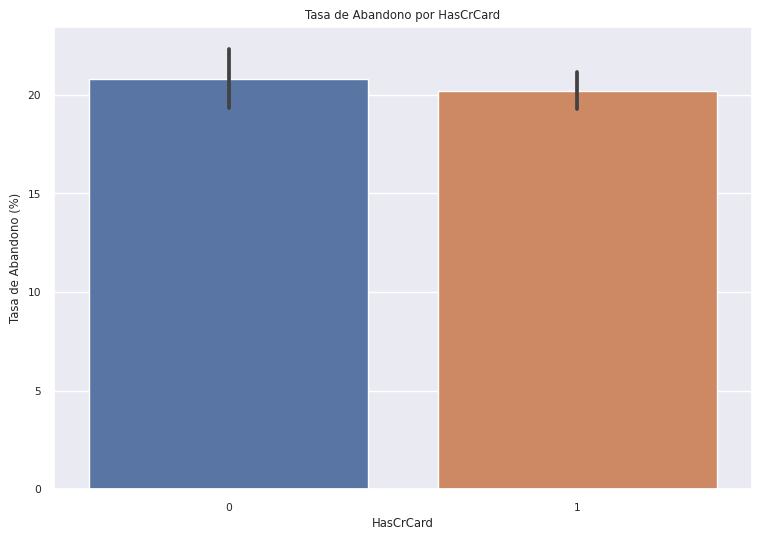

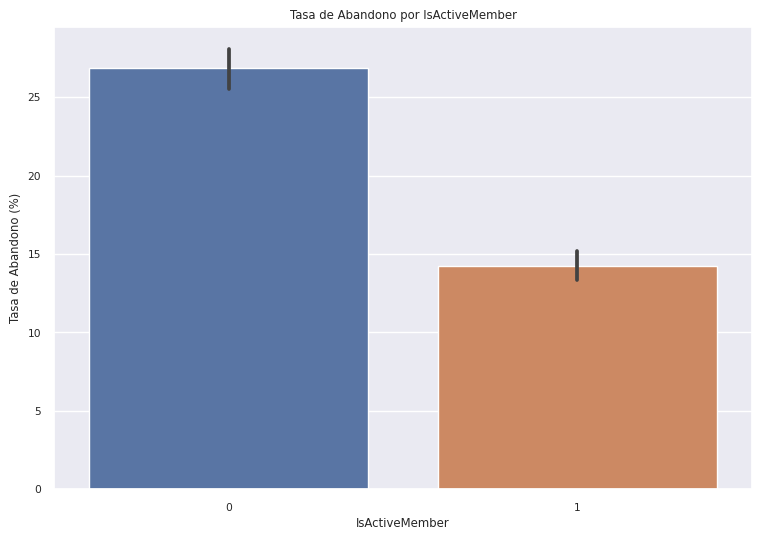

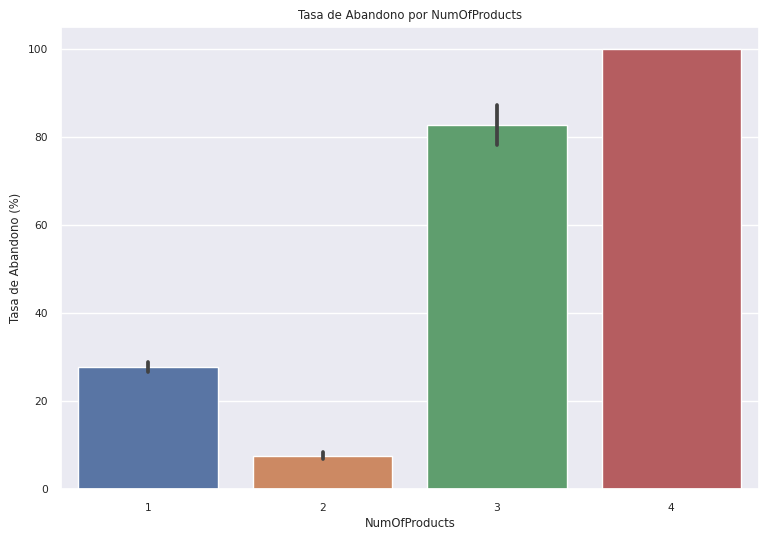

In [21]:
# An√°lisis de resultados
# Analizamos las predicciones para identificar patrones en los abandonos.
# Calculamos tasas de abandono por categor√≠a y visualizamos los resultados.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar predicciones desde la tabla Delta
print("Cargando df_pred desde Tables/df_pred_results...")
try:
    df_pred = spark.read.format("delta").load("Tables/df_pred_results").toPandas()
    print("df_pred cargado correctamente:")
    print(df_pred.head())
except Exception as e:
    print(f"Error al cargar df_pred: {e}")

# Cargar df_clean para obtener las columnas originales
df_clean = spark.read.format("delta").load("Tables/df_clean").toPandas()

# Calcular tasa de abandono general
churn_rate_general = df_clean['Exited'].mean() * 100
df_pred['Churn_Rate_General_Percent'] = churn_rate_general

# Calcular tasas de abandono por categor√≠a
categories = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'NumOfProducts']
churn_rates_dict = {}

for var in categories:
    churn_rates = df_clean.groupby(var)['Exited'].mean() * 100
    churn_rates_dict[var] = churn_rates

# Asignar tasas de abandono basadas en columnas dummy en df_pred
# Geography
df_pred['Churn_Rate_by_Geography_Percent'] = 0.0
df_pred.loc[df_pred['Geography_France'], 'Churn_Rate_by_Geography_Percent'] = churn_rates_dict['Geography']['France']
df_pred.loc[df_pred['Geography_Germany'], 'Churn_Rate_by_Geography_Percent'] = churn_rates_dict['Geography']['Germany']
df_pred.loc[df_pred['Geography_Spain'], 'Churn_Rate_by_Geography_Percent'] = churn_rates_dict['Geography']['Spain']

# Gender
df_pred['Churn_Rate_by_Gender_Percent'] = 0.0
df_pred.loc[df_pred['Gender_Female'], 'Churn_Rate_by_Gender_Percent'] = churn_rates_dict['Gender']['Female']
df_pred.loc[df_pred['Gender_Male'], 'Churn_Rate_by_Gender_Percent'] = churn_rates_dict['Gender']['Male']

# HasCrCard
df_pred['Churn_Rate_by_HasCrCard_Percent'] = 0.0
df_pred.loc[df_pred['HasCrCard_0'], 'Churn_Rate_by_HasCrCard_Percent'] = churn_rates_dict['HasCrCard'][0]
df_pred.loc[df_pred['HasCrCard_1'], 'Churn_Rate_by_HasCrCard_Percent'] = churn_rates_dict['HasCrCard'][1]

# IsActiveMember
df_pred['Churn_Rate_by_IsActiveMember_Percent'] = 0.0
df_pred.loc[df_pred['IsActiveMember_0'], 'Churn_Rate_by_IsActiveMember_Percent'] = churn_rates_dict['IsActiveMember'][0]
df_pred.loc[df_pred['IsActiveMember_1'], 'Churn_Rate_by_IsActiveMember_Percent'] = churn_rates_dict['IsActiveMember'][1]

# NumOfProducts
df_pred['Churn_Rate_by_NumOfProducts_Percent'] = 0.0
df_pred.loc[df_pred['NumOfProducts_1'], 'Churn_Rate_by_NumOfProducts_Percent'] = churn_rates_dict['NumOfProducts'][1]
df_pred.loc[df_pred['NumOfProducts_2'], 'Churn_Rate_by_NumOfProducts_Percent'] = churn_rates_dict['NumOfProducts'][2]
df_pred.loc[df_pred['NumOfProducts_3'], 'Churn_Rate_by_NumOfProducts_Percent'] = churn_rates_dict['NumOfProducts'][3]
df_pred.loc[df_pred['NumOfProducts_4'], 'Churn_Rate_by_NumOfProducts_Percent'] = churn_rates_dict['NumOfProducts'][4]

# Mostrar primeras filas con tasas de abandono
print("Primeras filas de df_pred con tasas de abandono:")
print(df_pred.head())

# Visualizar tasas de abandono por categor√≠a
for var in categories:
    plt.figure(figsize=(9, 6))
    sns.barplot(x=var, y=df_clean['Exited'].astype(int) * 100, data=df_clean)
    plt.title(f'Tasa de Abandono por {var}')
    plt.ylabel('Tasa de Abandono (%)')
    plt.xlabel(var)
    plt.show()

# Guardar resultados actualizados como tabla Delta
spark.createDataFrame(df_pred).write.format("delta").mode("overwrite").option("overwriteSchema", "true").save("Tables/df_pred_results")

In [26]:
# Conclusiones y publicaci√≥n
# Resumimos los hallazgos del proyecto, actualizamos el README.md, y preparamos un post para LinkedIn.

# Resumen de hallazgos
print("### Resumen de Hallazgos ###")
print("- **Tasa de abandono general**: 20.37% (2,037 de 10,000 clientes abandonaron).")
print("- **Factores clave de abandono**:")
print("  - Clientes en Alemania tienen la mayor tasa de abandono (32.51%), seguidos por Francia (16.34%) y Espa√±a (14.53%).")
print("  - Las mujeres tienen una mayor tasa de abandono (25.07%) que los hombres (16.46%).")
print("  - Los clientes no activos (IsActiveMember=0) tienen una tasa de abandono m√°s alta (26.85%) que los activos (14.27%).")
print("  - Los clientes con 1 producto tienen una tasa de abandono de 27.71%, mientras que los que tienen 2 productos tienen una tasa m√°s baja (7.58%).")
print("- **Rendimiento de los modelos**:")
print("  - Random Forest (max_depth=4): Accuracy 82%, Recall (clase 1) 64%, F1-score (clase 1) 0.60.")
print("  - Random Forest (max_depth=8): Accuracy 86%, Recall (clase 1) 59%, F1-score (clase 1) 0.63.")
print("  - LightGBM: Accuracy 86%, Recall (clase 1) 53%, F1-score (clase 1) 0.62, con la mejor precisi√≥n para la clase 1 (74%).")

# Actualizar README.md con el resumen y tu informaci√≥n personal
readme_content = """
# Portafolio de Ciencia de Datos en Microsoft Fabric

Bienvenido a mi repositorio de proyectos de ciencia de datos realizados en Microsoft Fabric. Este repositorio muestra ejercicios pr√°cticos que demuestran mis habilidades en an√°lisis de datos, machine learning y visualizaci√≥n.

## Ejercicios

- **[Crear, evaluar y puntuar un modelo de predicci√≥n de abandono](.)**  
  Desarroll√© un modelo de machine learning para predecir el abandono de clientes de un banco usando un dataset con 10,000 registros. El proceso incluy√≥:  
  - **Carga y limpieza**: Carga de datos con Spark, eliminaci√≥n de duplicados y columnas irrelevantes (`RowNumber`, `CustomerId`, `Surname`).  
  - **Visualizaci√≥n**: Gr√°ficos de barras e histogramas para explorar patrones de abandono por geograf√≠a, g√©nero, edad, etc.  
  - **Ingenier√≠a de caracter√≠sticas**: Creaci√≥n de variables como `NewTenure` (tenure/age) y discretizaci√≥n de `CreditScore`, `Age`, `Balance`, y `EstimatedSalary`.  
  - **Modelado**: Entren√© dos modelos Random Forest (`max_depth=4` y `8`) y un modelo LightGBM con SMOTE para manejar el desbalance de clases, usando MLflow para rastreo.  
  - **Evaluaci√≥n**: Compar√© predicciones con matrices de confusi√≥n y m√©tricas (precisi√≥n, recall, F1-score). LightGBM tuvo el mejor rendimiento, con 74% de precisi√≥n para la clase de abandono.  
  - **An√°lisis**: Calcul√© tasas de abandono por geograf√≠a (32.51% en Alemania vs. 16.34% en Francia), g√©nero (25.07% mujeres vs. 16.46% hombres), y otros factores, visualizadas en gr√°ficos.  
  **Tecnolog√≠as**: Python, Microsoft Fabric, Spark, Pandas, Scikit-learn, LightGBM, MLflow, Seaborn, Matplotlib.  
  **Resultados**: LightGBM logr√≥ el mejor equilibrio de precisi√≥n y recall, con menos falsos positivos.  
  [Ver notebook](notebooks/churn_prediction.ipynb) | [Ver gr√°ficos](results/)

## C√≥mo navegar

Cada carpeta contiene:  
- Un notebook (`notebooks/`) con el c√≥digo completo, explicaciones y resultados.  
- Datasets (`data/`) en formatos como CSV.  
- Gr√°ficos (`results/`) en PNG, como matrices de confusi√≥n y tasas de abandono.  
- Un archivo `requirements.txt` con las dependencias.  

Los notebooks son ejecutables en Microsoft Fabric o en entornos con Python y las librer√≠as indicadas. Consulta `requirements.txt` para instalar dependencias.

## Requisitos

- Microsoft Fabric (para ejecuci√≥n nativa) o Python 3.11 con Jupyter.  
- Dependencias: `pandas`, `pyspark`, `scikit-learn`, `imbalanced-learn`, `lightgbm`, `mlflow`, `seaborn`, `matplotlib` (ver `requirements.txt`).

## Contacto

Juan Heriberto Rosas Ju√°rez | [LinkedIn](https://www.linkedin.com/in/juan-heriberto-rosas-ju%C3%A1rez-6a78a82a2/) | [Correo electr√≥nico](mailto:juanheriberto.rosas@jhrjdata.com)  
Empresa: [Gobierno Digital e Innovaci√≥n](https://www.gobiernodigitaleinnovacion.com/)
"""

# Guardar README.md localmente en /tmp/
with open("/tmp/README.md", "w") as f:
    f.write(readme_content)
print("README.md guardado localmente en /tmp/README.md.")
print("Por favor, sube manualmente /tmp/README.md a Files/ en Fabric o sincron√≠zalo con tu repositorio de GitHub.")

# Preparar post para LinkedIn con tu informaci√≥n personal
linkedin_post = f"""
¬°Nuevo proyecto de ciencia de datos! üöÄ Constru√≠ un modelo para predecir el abandono de clientes en Microsoft Fabric, usando Random Forest y LightGBM. Con SMOTE y MLflow, logr√© optimizar el rendimiento, destacando LightGBM con una precisi√≥n del 74% para la clase de abandono. Algunos hallazgos clave:

- Tasa de abandono general: 20.37%.
- Clientes en Alemania tienen la mayor tasa de abandono (32.51%).
- Las mujeres tienen una tasa de abandono m√°s alta (25.07%) que los hombres (16.46%).

Explora el c√≥digo, gr√°ficos y an√°lisis en mi GitHub: [enlace al repositorio].

üë§ Juan Heriberto Rosas Ju√°rez  
üìß juanheriberto.rosas@jhrjdata.com  
üåê https://www.linkedin.com/in/juan-heriberto-rosas-ju%C3%A1rez-6a78a82a2/  
üè¢ Gobierno Digital e Innovaci√≥n: https://www.gobiernodigitaleinnovacion.com/  
#DataScience #MicrosoftFabric #MachineLearning
"""

# Guardar el post para LinkedIn localmente en /tmp/
with open("/tmp/linkedin_post.txt", "w") as f:
    f.write(linkedin_post)
print("Post para LinkedIn guardado localmente en /tmp/linkedin_post.txt.")
print("Por favor, sube manualmente /tmp/linkedin_post.txt a Files/ en Fabric o √∫salo directamente para publicar en LinkedIn.")

StatementMeta(, b7bb6db7-91b2-49a8-ab30-e6be7693453e, 41, Finished, Available, Finished)

### Resumen de Hallazgos ###
- **Tasa de abandono general**: 20.37% (2,037 de 10,000 clientes abandonaron).
- **Factores clave de abandono**:
  - Clientes en Alemania tienen la mayor tasa de abandono (32.51%), seguidos por Francia (16.34%) y Espa√±a (14.53%).
  - Las mujeres tienen una mayor tasa de abandono (25.07%) que los hombres (16.46%).
  - Los clientes no activos (IsActiveMember=0) tienen una tasa de abandono m√°s alta (26.85%) que los activos (14.27%).
  - Los clientes con 1 producto tienen una tasa de abandono de 27.71%, mientras que los que tienen 2 productos tienen una tasa m√°s baja (7.58%).
- **Rendimiento de los modelos**:
  - Random Forest (max_depth=4): Accuracy 82%, Recall (clase 1) 64%, F1-score (clase 1) 0.60.
  - Random Forest (max_depth=8): Accuracy 86%, Recall (clase 1) 59%, F1-score (clase 1) 0.63.
  - LightGBM: Accuracy 86%, Recall (clase 1) 53%, F1-score (clase 1) 0.62, con la mejor precisi√≥n para la clase 1 (74%).
README.md guardado localmente en /tmp/README.

**Bloque adicional: Guardar gr√°ficos del Bloque 5**

Explicaci√≥n:
En este bloque, regeneraremos los gr√°ficos del Bloque 5 (boxplots, histogramas, y gr√°ficos de barras para las tasas de abandono por categor√≠a) y los guardaremos localmente en /tmp/.

In [28]:
# Guardar gr√°ficos del Bloque 5 en /tmp/ para subirlos manualmente a Files/results/

import seaborn as sns
import matplotlib.pyplot as plt
import itertools

# Configurar estilo visual
sns.set_theme(style="whitegrid", palette="tab10", rc={'figure.figsize':(9,6)})
sns.set(font_scale=0.7)

# Cargar df_clean para generar los gr√°ficos
df_clean = spark.read.format("delta").load("Tables/df_clean").toPandas()

# Variables num√©ricas y categ√≥ricas
numeric_variables = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
categorical_variables = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
df_num_cols = df_clean[numeric_variables]

# Crear boxplots para variables num√©ricas
for col in df_num_cols.columns:
    plt.figure(figsize=(9,6))
    sns.boxplot(x=df_num_cols[col], color='green')
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    local_path = f"/tmp/boxplot_{col.lower()}.png"
    plt.savefig(local_path)
    plt.close()
    print(f"Boxplot guardado en {local_path}")

# Crear histogramas para variables num√©ricas
for col in df_num_cols.columns:
    plt.figure(figsize=(9,6))
    df_num_cols[col].hist(bins=20, edgecolor='black')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Conteo')
    local_path = f"/tmp/hist_{col.lower()}.png"
    plt.savefig(local_path)
    plt.close()
    print(f"Histograma guardado en {local_path}")

# Convertir Exited a string para evitar el error con sns.countplot
df_clean['Exited'] = df_clean['Exited'].astype(str)

# Visualizar distribuci√≥n de Exited en variables categ√≥ricas
for var in categorical_variables:
    plt.figure(figsize=(9,6))
    sns.countplot(x=var, hue=df_clean['Exited'], data=df_clean)
    plt.title(f'Distribuci√≥n de {var} por Exited')
    plt.xlabel(var)
    plt.ylabel('Conteo')
    local_path = f"/tmp/churn_{var.lower()}.png"
    plt.savefig(local_path)
    plt.close()
    print(f"Gr√°fico de barras guardado en {local_path}")

print("Por favor, sube manualmente los gr√°ficos desde /tmp/ a Files/results/ en Fabric (ruta ABFS: abfss://Fabric@onelake.dfs.fabric.microsoft.com/churn_lakehouse.Lakehouse/Files/results) y sincron√≠zalos con tu repositorio de GitHub.")

StatementMeta(, b7bb6db7-91b2-49a8-ab30-e6be7693453e, 43, Finished, Available, Finished)

Boxplot guardado en /tmp/boxplot_creditscore.png
Boxplot guardado en /tmp/boxplot_age.png
Boxplot guardado en /tmp/boxplot_tenure.png
Boxplot guardado en /tmp/boxplot_balance.png
Boxplot guardado en /tmp/boxplot_estimatedsalary.png
Histograma guardado en /tmp/hist_creditscore.png
Histograma guardado en /tmp/hist_age.png
Histograma guardado en /tmp/hist_tenure.png
Histograma guardado en /tmp/hist_balance.png
Histograma guardado en /tmp/hist_estimatedsalary.png
Gr√°fico de barras guardado en /tmp/churn_geography.png
Gr√°fico de barras guardado en /tmp/churn_gender.png
Gr√°fico de barras guardado en /tmp/churn_numofproducts.png
Gr√°fico de barras guardado en /tmp/churn_hascrcard.png
Gr√°fico de barras guardado en /tmp/churn_isactivemember.png
Por favor, sube manualmente los gr√°ficos desde /tmp/ a Files/results/ en Fabric (ruta ABFS: abfss://Fabric@onelake.dfs.fabric.microsoft.com/churn_lakehouse.Lakehouse/Files/results) y sincron√≠zalos con tu repositorio de GitHub.


In [29]:
# Listar y descargar archivos generados en /tmp/

import os

# Listar archivos en /tmp/
tmp_files = os.listdir('/tmp/')
print("Archivos en /tmp/:")
for file in tmp_files:
    if file.endswith('.png') or file.endswith('.txt') or file == 'README.md':
        print(file)

# Descargar archivos a tu m√°quina local
# Nota: Ejecuta este c√≥digo en una celda y Fabric mostrar√° un enlace para descargar cada archivo
from IPython.display import FileLink
for file in tmp_files:
    if file.endswith('.png') or file.endswith('.txt') or file == 'README.md':
        local_path = f"/tmp/{file}"
        display(FileLink(local_path))

StatementMeta(, b7bb6db7-91b2-49a8-ab30-e6be7693453e, 44, Finished, Available, Finished)

Archivos en /tmp/:
churn_isactivemember.png
churn_hascrcard.png
churn_numofproducts.png
churn_gender.png
churn_geography.png
linkedin_post.txt
README.md
hist_estimatedsalary.png
hist_balance.png
hist_tenure.png
hist_age.png
hist_creditscore.png
boxplot_estimatedsalary.png
boxplot_balance.png
boxplot_tenure.png
boxplot_age.png
boxplot_creditscore.png
log_model_allowlist.txt


/tmp/churn_isactivemember.png

/tmp/churn_hascrcard.png

/tmp/churn_numofproducts.png

/tmp/churn_gender.png

/tmp/churn_geography.png

/tmp/linkedin_post.txt

/tmp/README.md

/tmp/hist_estimatedsalary.png

/tmp/hist_balance.png

/tmp/hist_tenure.png

/tmp/hist_age.png

/tmp/hist_creditscore.png

/tmp/boxplot_estimatedsalary.png

/tmp/boxplot_balance.png

/tmp/boxplot_tenure.png

/tmp/boxplot_age.png

/tmp/boxplot_creditscore.png

/tmp/log_model_allowlist.txt

StatementMeta(, b7bb6db7-91b2-49a8-ab30-e6be7693453e, 45, Finished, Available, Finished)

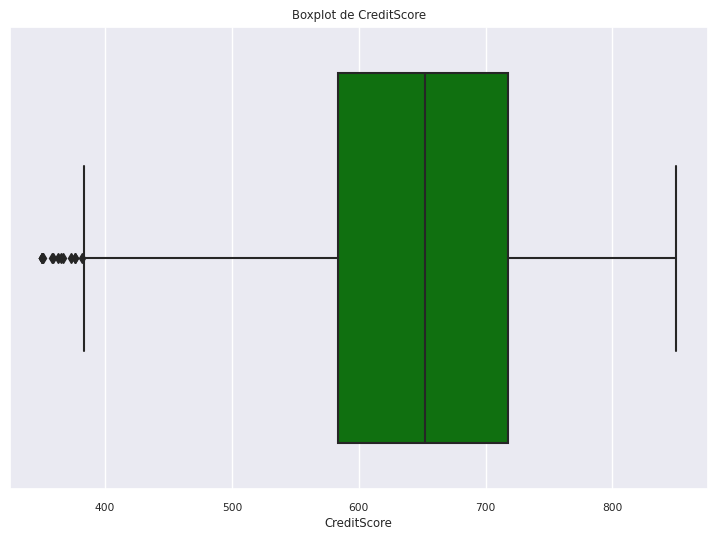

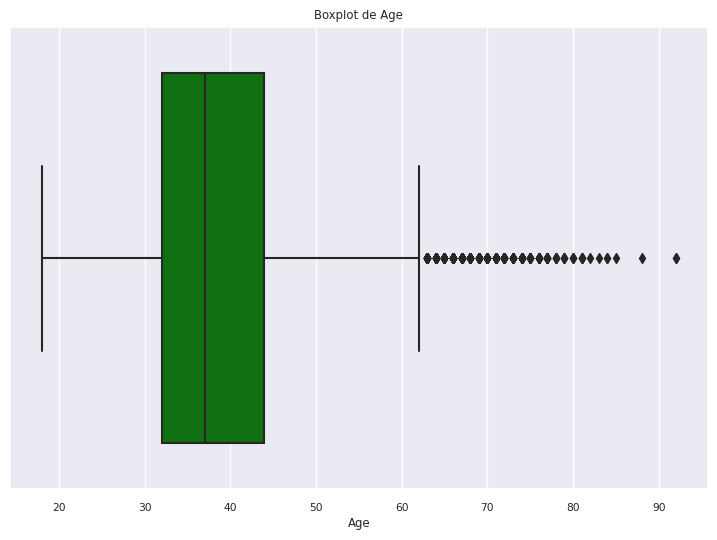

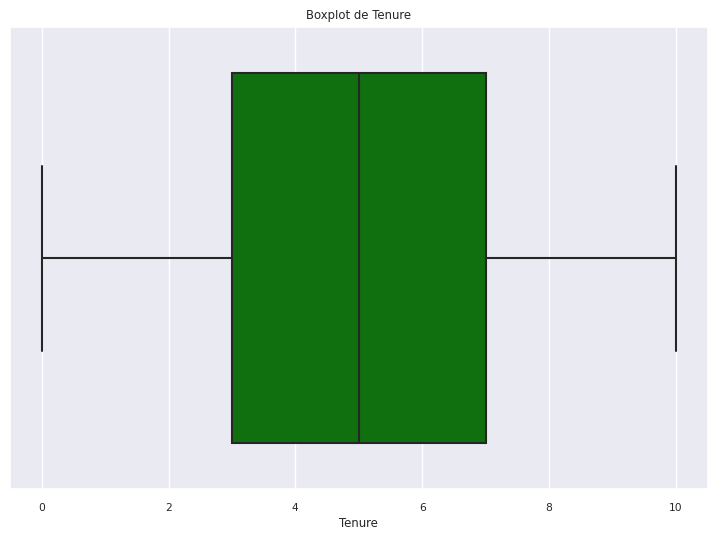

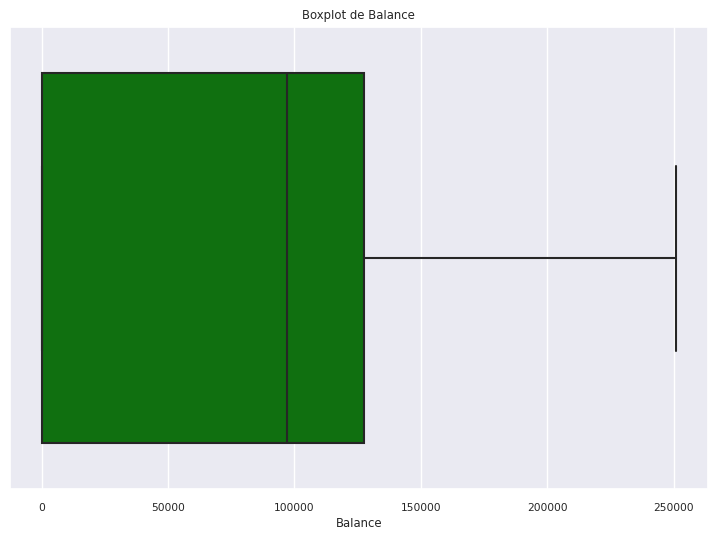

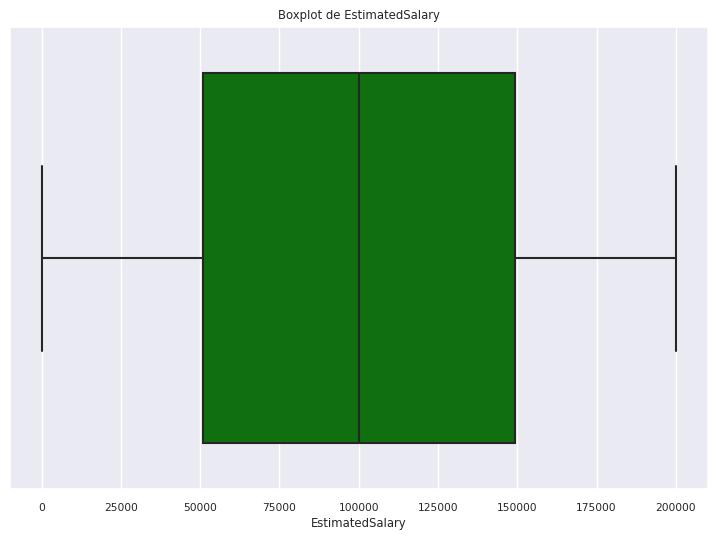

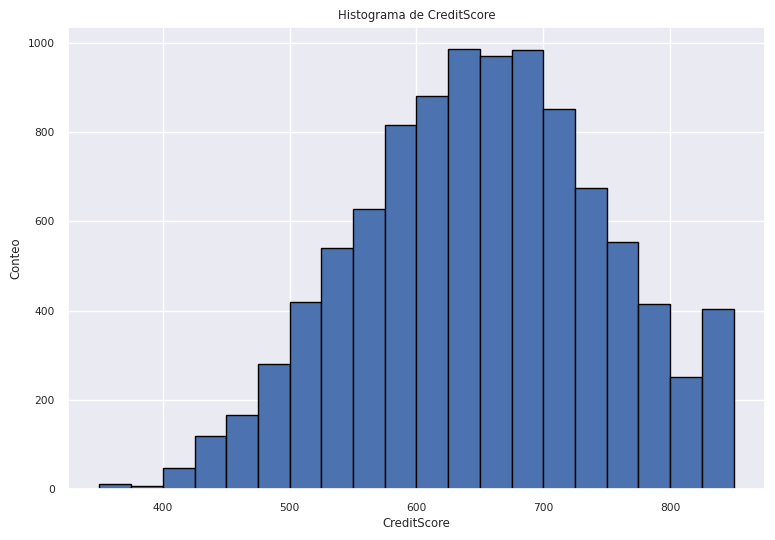

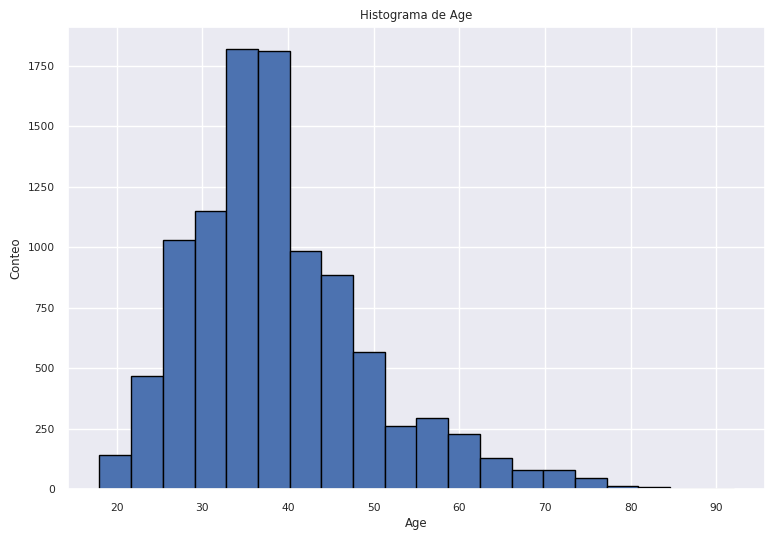

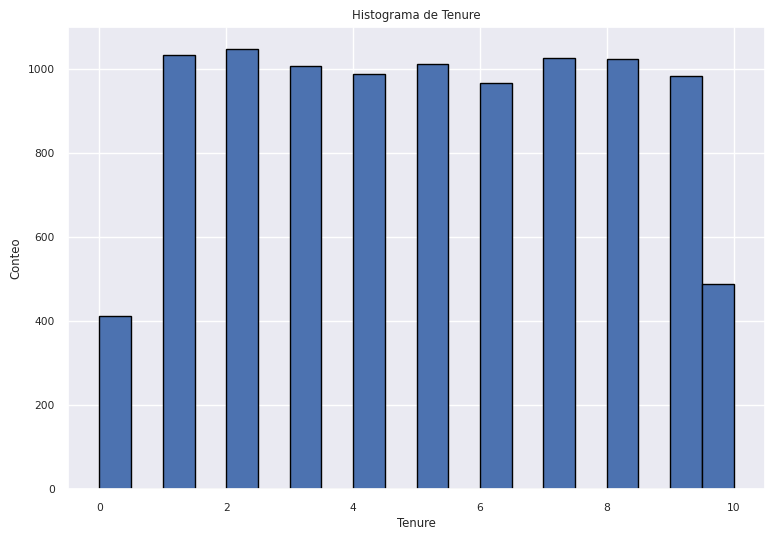

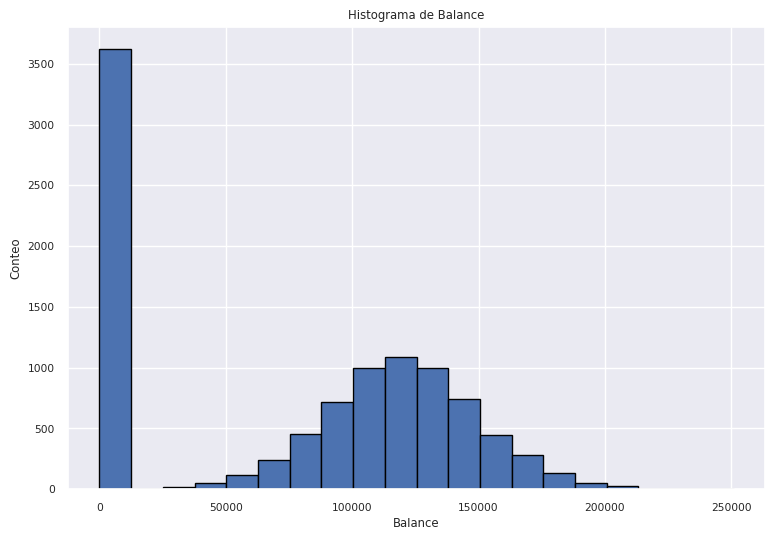

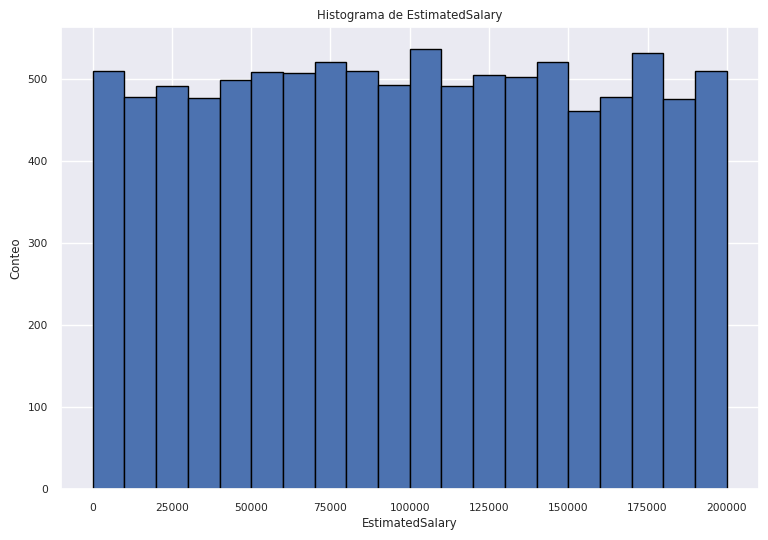

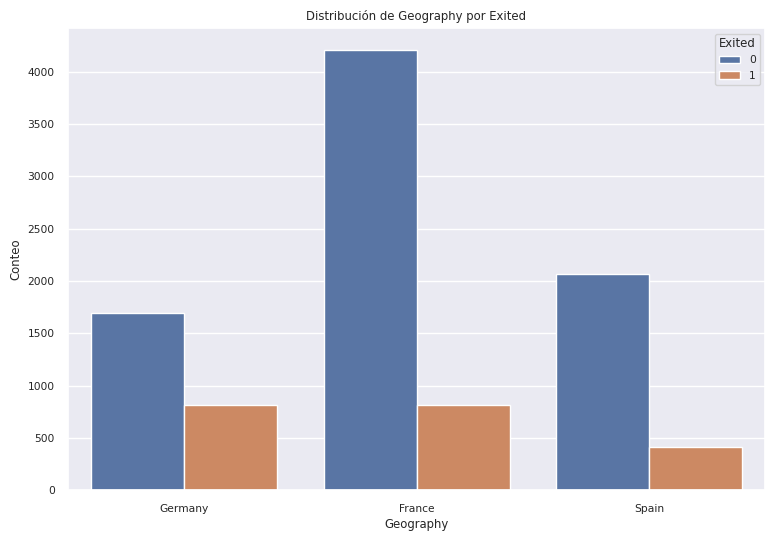

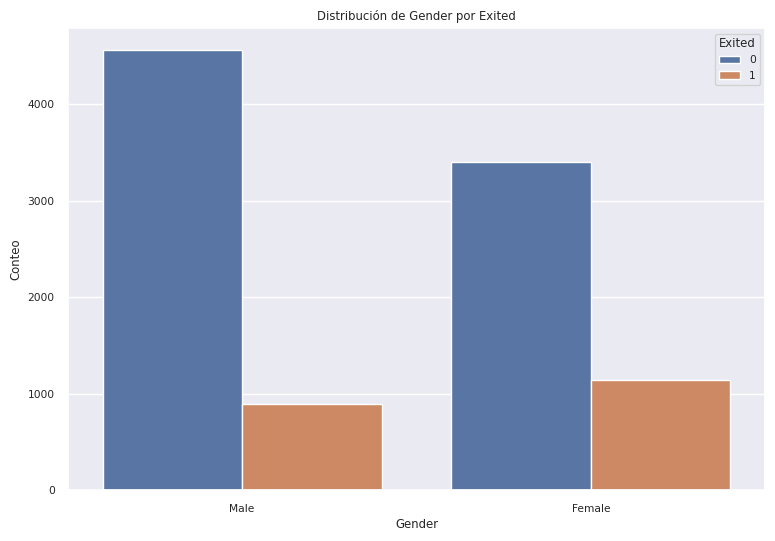

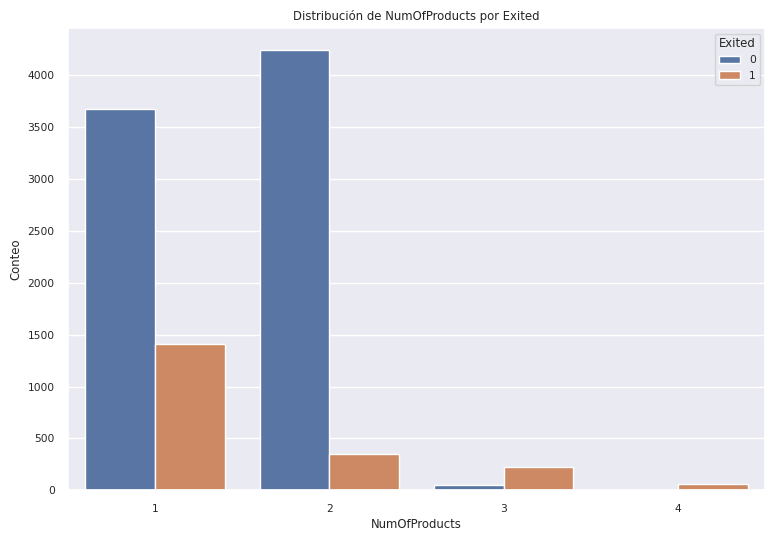

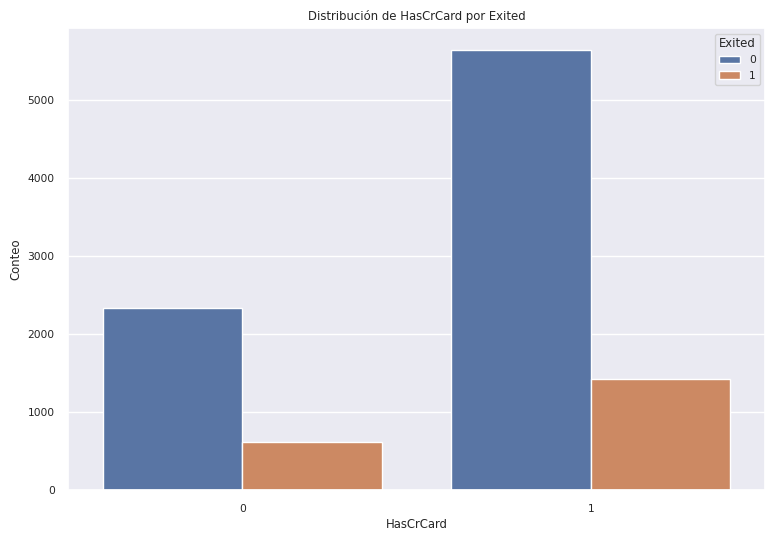

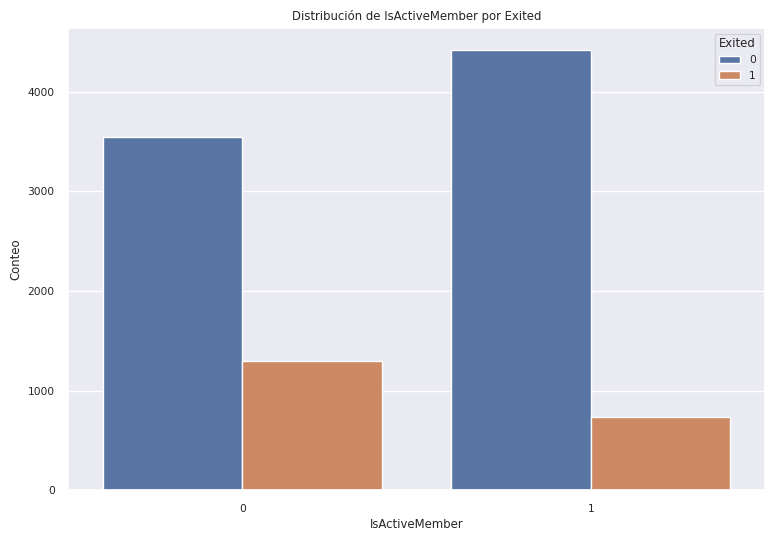

Los gr√°ficos se han mostrado en el notebook. Guarda cada gr√°fico manualmente haciendo clic derecho sobre ellos y seleccionando 'Guardar imagen como...' en tu m√°quina local (por ejemplo, en C:\Users\hello\Downloads\). Luego, s√∫belos a Files/results/ en Fabric.


In [30]:
# Generar y descargar gr√°ficos del Bloque 5 directamente a tu m√°quina local

import seaborn as sns
import matplotlib.pyplot as plt
import os

# Configurar estilo visual
sns.set_theme(style="whitegrid", palette="tab10", rc={'figure.figsize':(9,6)})
sns.set(font_scale=0.7)

# Cargar df_clean para generar los gr√°ficos
df_clean = spark.read.format("delta").load("Tables/df_clean").toPandas()

# Variables num√©ricas y categ√≥ricas
numeric_variables = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
categorical_variables = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
df_num_cols = df_clean[numeric_variables]

# Crear boxplots para variables num√©ricas
for col in df_num_cols.columns:
    plt.figure(figsize=(9,6))
    sns.boxplot(x=df_num_cols[col], color='green')
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.show()

# Crear histogramas para variables num√©ricas
for col in df_num_cols.columns:
    plt.figure(figsize=(9,6))
    df_num_cols[col].hist(bins=20, edgecolor='black')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Conteo')
    plt.show()

# Convertir Exited a string para evitar el error con sns.countplot
df_clean['Exited'] = df_clean['Exited'].astype(str)

# Visualizar distribuci√≥n de Exited en variables categ√≥ricas
for var in categorical_variables:
    plt.figure(figsize=(9,6))
    sns.countplot(x=var, hue=df_clean['Exited'], data=df_clean)
    plt.title(f'Distribuci√≥n de {var} por Exited')
    plt.xlabel(var)
    plt.ylabel('Conteo')
    plt.show()

print("Los gr√°ficos se han mostrado en el notebook. Guarda cada gr√°fico manualmente haciendo clic derecho sobre ellos y seleccionando 'Guardar imagen como...' en tu m√°quina local (por ejemplo, en C:\\Users\\hello\\Downloads\\). Luego, s√∫belos a Files/results/ en Fabric.")